# Large Language Models (LLMs) and Generative AI

In this notebook, we’ll take a closer look at what happens behind the scenes when we interact with user interfaces of generative AI models like ChatGPT or Claude. Originally, OpenAI started as a startup focused on open innovation with the goal of building artificial general intelligence (AGI). However, over time, OpenAI has shifted away from that model. While the earlier GPT models were open-source, later versions like GPT-4 are now closed-source and available only to paid subscribers. As this graph shows, this has been a pervasive problem in data science:

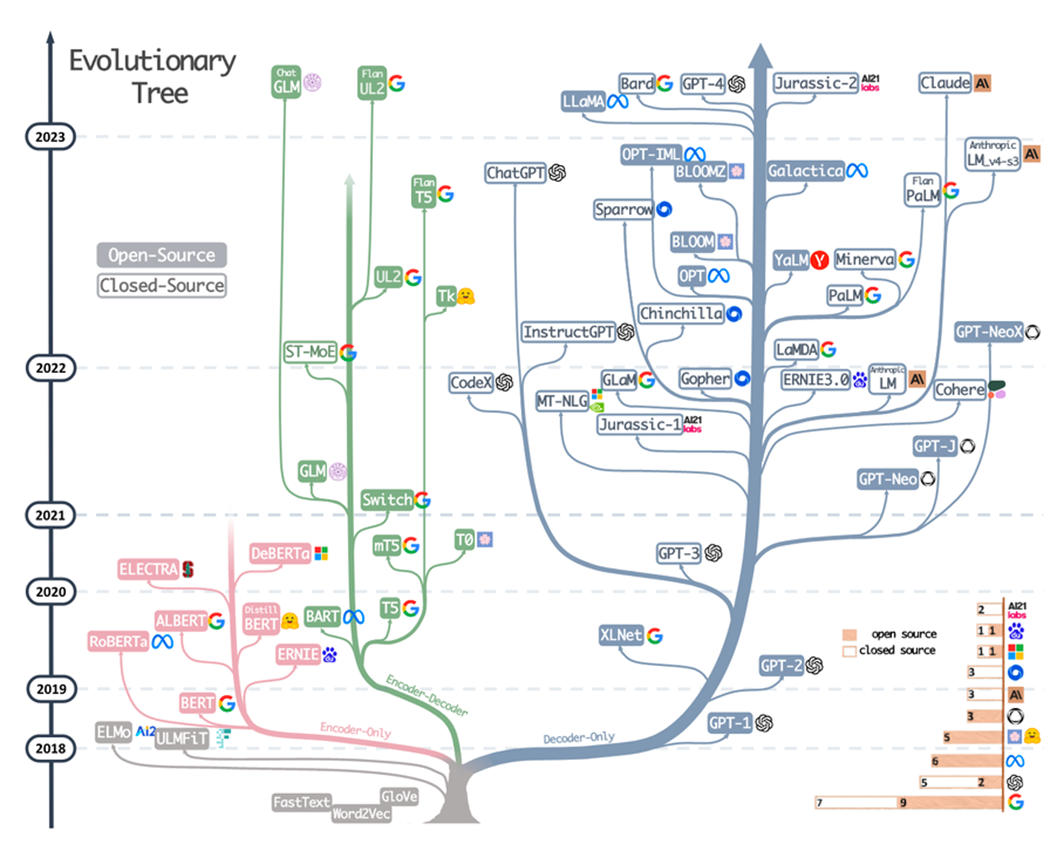

One of the few AI companies that still keeps their large language models (LLMs) open is Meta, with its LLAMA family of models. However, to access them, you'll need to register for a developer account and obtain an API access token. If you’re curious about how this works, you can follow the steps here to register: https://www.merge.dev/blog/llama-api-key.

Since obtaining an API token takes a bit of time (a few hours), we’ll use the transformers library from Hugging Face (introduced in the last session) to connect to an older OpenAI GPT model that is still available to the public: GPT-Neo 1.3B. The "1.3B" refers to the 1.3 billion parameters this model has (check out the lecture video from Week 3 for more information on how parameters are calculated and their role in AI models).

In [ ]:
!pip install transformers

from transformers import AutoModelForCausalLM, AutoTokenizer

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


We can now load the GPT-Neo 1.3B model directly from from Hugging Face:

In [ ]:
model_name = "EleutherAI/gpt-neo-1.3B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

The process is similar to how we interact with ChatGPT’s GUI, where we use prompts to generate responses:

In [ ]:
prompt = "Tell me about yourself"

 However, the key difference here is that without a user-friendly interface, we are responsible for preparing the prompt ourselves. This involves tokenizing the text, essentially breaking it down into smaller units (tokens) that the model can understand. Tokenization converts the prompt into a numerical format which maps each token to the model’s vocabulary.

In [ ]:
inputs = tokenizer(prompt, return_tensors="pt")

In [ ]:
inputs

{'input_ids': tensor([[24446,   502,   546,  3511]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

Each word or sub-word in the text is mapped to a unique token ID from the tokenizer's **vocabulary**: 50,257 unique tokens (which include words, subwords, punctuation, and special characters) that it can use to understand and generate text.

* 24446 corresponds to "Tell"
* 502: "me"
* 546:"about"
* 3511: "yourself"

The model then processes this input to generate an output, which is decoded back into human-readable text. In essence, we're handling the lower-level mechanics of transforming raw text into a format the model can interpret and respond to:

In [ ]:
outputs = model.generate(**inputs, max_new_tokens=10)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
outputs

tensor([[24446,   502,   546,  3511,   526,   366,    40,  1101,   257,  6260,
           526,   366,    40,  1101]])

We can now decode and print the generated text:

In [ ]:
print(tokenizer.decode(outputs[0]))

Tell me about yourself." "I'm a writer." "I'm


* 24446 → "Tell"
* 502 → "me"
* 546 → "about"
* 3511 → "yourself"
These first four tokens correspond to the input prompt "Tell me about yourself".

Then come the generated output tokens:
* 526 → "."
* 366 → "I"
* 40 → "'"
* 1101 → "m"
* 526 → "."

These tokens correspond to the generated text "I'm a writer."



In [ ]:
prompt = "What's 2+2?"
inputs = tokenizer(prompt, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=15)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What's 2+2?

The answer is 2+2.

The answer is 2


Note: GPT-Neo has a 2048-token limit for the entire context (both the input prompt and generated text), so the sum of the input and generated tokens cannot exceed 2048.

For reference, the free version of ChatGPT, which uses GPT-3.5, has a token limit of 4,096 tokens. With the paid ChatGPT Plus, you can access GPT-4, which offers either an 8K token limit or a 32K token limit, depending on the API or tool you're using.

Additionally, the number of parameters in a model impacts the memory required for a Colab session. Larger models with more parameters (e.g., GPT-Neo vs. BERT) will use more memory, which can lead to running out of memory or hitting usage caps.

## Key Differences between BERT and GPT:
* BERT is not generative, and it requires task-specific fine-tuning to work well. To classify text with BERT, you would typically fine-tune BERT on a labeled dataset (e.g., training BERT to classify text into ethical theories like "consequentialism," "deontology," etc.). After fine-tuning, you can use BERT to classify new texts.

* GPT is a generative model that can generate responses and classify text in a zero-shot manner (like the example in the previous response), based on a given prompt. You can ask the model to predict which category a given text belongs to by framing your input as a question or instruction.





## Your Task:
To truly harness the power of LLMs (large language models) in generative AI, we will explore a tool by Google called **[NotebookLM](https://notebooklm.google.com/)**. This tool allows you to interact with various types of information, including PDFs, copied text, and even YouTube videos, and infer insights from them.

After the in-class demo of NotebookLM, your task is to explore the strengths and limitations of the system by applying it to a piece of information you're familiar with and comfortable sharing. This could be any publicly available video or text, for example the "Stochastic Parrots" paper we read for this week. After experimenting with the source(s), write a brief reflection on which aspects the model captures well and which it struggles with.

[Response]